In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [2]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [3]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [4]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840859 entries, 0 to 1840858
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 28.1 MB


In [5]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1840854    0.12
1840855    0.13
1840856    0.13
1840857    0.13
1840858    0.13
Name: kWh, Length: 1840859, dtype: float64

In [6]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1840854    0.12
1840855    0.13
1840856    0.13
1840857    0.13
1840858    0.13
Name: kWh, Length: 1840859, dtype: float64

In [7]:
l=len(conso_data)-1
l

1840858

In [8]:
conso_data['sec']=conso_data['Interval']/1000


In [9]:
conso_data['Wh']=3600000/conso_data['Interval']


In [10]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [11]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840859 entries, 0 to 1840858
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 70.2 MB


In [12]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1840854,29361,0.12,29.361,122.611628,45236518921
1840855,28194,0.13,28.194,127.686742,45236547115
1840856,27541,0.13,27.541,130.714208,45236574656
1840857,27263,0.13,27.263,132.047097,45236601919
1840858,28433,0.13,28.433,126.613442,45236630352


In [13]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

45236630352000

In [14]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 20, 59, 39, 789491)

In [15]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [16]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [17]:
base

datetime.datetime(2023, 8, 21, 20, 59, 39, 789491)

In [18]:
# create column 'dates' with time cumulated time from base
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['dates']

0         2023-08-21 21:00:01.723491
1         2023-08-21 21:00:23.581491
2         2023-08-21 21:00:45.582491
3         2023-08-21 21:01:07.510491
4         2023-08-21 21:01:29.401491
                     ...            
1840854   2025-01-26 10:41:38.710491
1840855   2025-01-26 10:42:06.904491
1840856   2025-01-26 10:42:34.445491
1840857   2025-01-26 10:43:01.708491
1840858   2025-01-26 10:43:30.141491
Name: dates, Length: 1840859, dtype: datetime64[ns]

## créer les dates

In [19]:
# create column 'days' avec format 'dd/mm/yy'
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:00:01.723491,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:00:23.581491,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:00:45.582491,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:01:07.510491,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:01:29.401491,21/08/23
...,...,...,...,...,...,...,...
1840854,29361,0.12,29.361,122.611628,45236518921,2025-01-26 10:41:38.710491,26/01/25
1840855,28194,0.13,28.194,127.686742,45236547115,2025-01-26 10:42:06.904491,26/01/25
1840856,27541,0.13,27.541,130.714208,45236574656,2025-01-26 10:42:34.445491,26/01/25
1840857,27263,0.13,27.263,132.047097,45236601919,2025-01-26 10:43:01.708491,26/01/25


### save conso_data with dates

In [20]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [21]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('26/01/25', 26, 1, 2025)

In [22]:
here = now.strftime('%H:%M:%S')
here

'10:43:57'

In [23]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [24]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1323 entries, 1839536 to 1840858
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1323 non-null   int64         
 1   kWh        1323 non-null   float64       
 2   sec        1323 non-null   float64       
 3   Wh         1323 non-null   float64       
 4   cumul(ms)  1323 non-null   int64         
 5   dates      1323 non-null   datetime64[ns]
 6   days       1323 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 82.7+ KB


In [25]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [26]:
data = list(df_grp['kWh'])
print(data)

[0.585, 3.702, 4.24, 3.679, 3.967, 4.61, 3.707, 3.447, 3.509, 3.699, 3.463, 4.098, 4.242, 3.659, 3.623, 3.639, 3.32, 3.373, 4.06, 4.055, 4.018, 4.09, 3.503, 4.261, 3.936, 3.749, 4.125, 4.64, 4.101, 3.219, 3.167, 3.876, 3.799, 3.089, 3.787, 4.164, 3.627, 3.711, 4.596, 4.28, 4.443, 3.89, 3.446, 4.269, 3.906, 3.799, 3.526, 3.986, 3.728, 3.445, 4.128, 3.387, 3.834, 3.881, 3.608, 3.75, 4.3, 3.259, 3.878, 3.139, 2.056, 2.042, 2.318, 4.073, 3.652, 4.31, 3.628, 3.982, 3.77, 3.697, 4.219, 3.969, 3.786, 3.125, 3.769, 3.587, 3.547, 3.713, 3.677, 3.332, 3.816, 3.258, 3.748, 3.607, 4.062, 3.564, 3.523, 3.684, 4.111, 4.334, 3.938, 4.141, 4.265, 3.822, 3.92, 3.787, 3.788, 3.824, 4.069, 4.409, 3.873, 3.507, 3.68, 3.674, 3.352, 3.835, 3.792, 4.308, 3.525, 4.157, 3.599, 3.908, 4.67, 3.602, 3.568, 3.527, 3.988, 3.832, 4.164, 3.84, 3.845, 3.621, 5.078, 3.748, 3.676, 4.28, 4.201, 4.39, 4.49, 4.135, 3.651, 4.464, 4.707, 4.126, 4.751, 4.471, 3.66, 4.064, 3.883, 3.615, 3.567, 3.962, 3.659, 3.723, 3.628, 3.488

In [27]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [28]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [29]:
df = conso_data
len(df)

1840859

In [30]:
period(p=2)

2023-08-22 03:06:15.526491	2023-08-22 10:10:31.146491	7h 4m 15s 	2000


In [ ]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.298451
dtype: float64

In [32]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.506398
dtype: float64

In [33]:
last=df_grp.iloc[-1]['kWh']
last

1.323

In [34]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1323 entries, 1839536 to 1840858
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1323 non-null   int64         
 1   kWh        1323 non-null   float64       
 2   sec        1323 non-null   float64       
 3   Wh         1323 non-null   float64       
 4   cumul(ms)  1323 non-null   int64         
 5   dates      1323 non-null   datetime64[ns]
 6   days       1323 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 82.7+ KB


In [35]:
# select day
day = today
#day = '16/08/24'


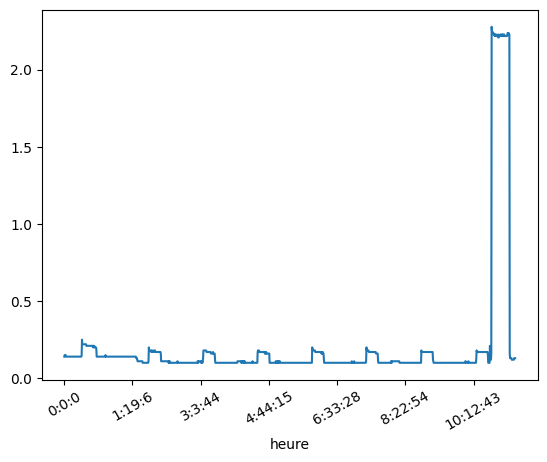

In [36]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [37]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:00:01.723491,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:00:23.581491,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:00:45.582491,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:01:07.510491,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:01:29.401491,21/08/23
...,...,...,...,...,...,...,...
1840854,29361,0.12,29.361,122.611628,45236518921,2025-01-26 10:41:38.710491,26/01/25
1840855,28194,0.13,28.194,127.686742,45236547115,2025-01-26 10:42:06.904491,26/01/25
1840856,27541,0.13,27.541,130.714208,45236574656,2025-01-26 10:42:34.445491,26/01/25
1840857,27263,0.13,27.263,132.047097,45236601919,2025-01-26 10:43:01.708491,26/01/25


In [38]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:0,25272,0.14,25.272,142.450142,45198020992,2025-01-26 00:00:00.781491,26/01/25
0:0:24,23862,0.15,23.862,150.867488,45198044854,2025-01-26 00:00:24.643491,26/01/25
0:0:48,24128,0.15,24.128,149.204244,45198068982,2025-01-26 00:00:48.771491,26/01/25
0:1:12,23894,0.15,23.894,150.665439,45198092876,2025-01-26 00:01:12.665491,26/01/25
0:1:37,24465,0.15,24.465,147.148988,45198117341,2025-01-26 00:01:37.130491,26/01/25
...,...,...,...,...,...,...,...
10:41:38,29361,0.12,29.361,122.611628,45236518921,2025-01-26 10:41:38.710491,26/01/25
10:42:6,28194,0.13,28.194,127.686742,45236547115,2025-01-26 10:42:06.904491,26/01/25
10:42:34,27541,0.13,27.541,130.714208,45236574656,2025-01-26 10:42:34.445491,26/01/25


In [39]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 22/01/25 4.783
Min : 04/01/25 3.076


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1839536,25272,0.14,25.272,142.450142,45198020992,2025-01-26 00:00:00.781491,26/01/25,0:0:0
1839537,23862,0.15,23.862,150.867488,45198044854,2025-01-26 00:00:24.643491,26/01/25,0:0:24
1839538,24128,0.15,24.128,149.204244,45198068982,2025-01-26 00:00:48.771491,26/01/25,0:0:48
1839539,23894,0.15,23.894,150.665439,45198092876,2025-01-26 00:01:12.665491,26/01/25,0:1:12
1839540,24465,0.15,24.465,147.148988,45198117341,2025-01-26 00:01:37.130491,26/01/25,0:1:37
...,...,...,...,...,...,...,...,...
1840854,29361,0.12,29.361,122.611628,45236518921,2025-01-26 10:41:38.710491,26/01/25,10:41:38
1840855,28194,0.13,28.194,127.686742,45236547115,2025-01-26 10:42:06.904491,26/01/25,10:42:6
1840856,27541,0.13,27.541,130.714208,45236574656,2025-01-26 10:42:34.445491,26/01/25,10:42:34
1840857,27263,0.13,27.263,132.047097,45236601919,2025-01-26 10:43:01.708491,26/01/25,10:43:1


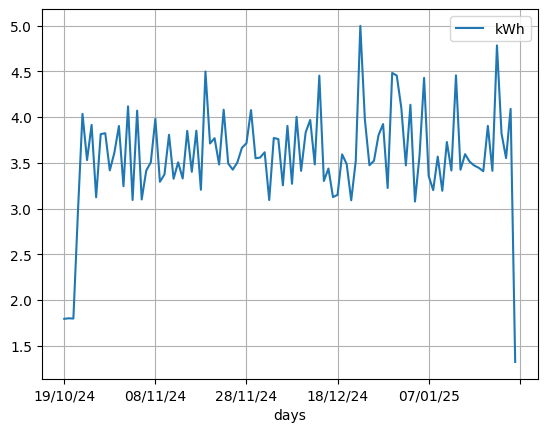

In [40]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2025-01-26 00:00:00.781491	2025-01-26 08:22:19.725491	8h 22m 18s 	1000
2025-01-26 08:22:19.725491	2025-01-26 10:43:30.141491	2h 21m 10s 	323
<class 'pandas.core.frame.DataFrame'>
Index: 1323 entries, 1839536 to 1840858
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1323 non-null   int64         
 1   kWh        1323 non-null   float64       
 2   sec        1323 non-null   float64       
 3   Wh         1323 non-null   float64       
 4   cumul(ms)  1323 non-null   int64         
 5   dates      1323 non-null   datetime64[ns]
 6   days       1323 non-null   object        
 7   heure      1323 non-null   object        
 8   hours      1323 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 103.4+ KB


('26/01/25', <Axes: xlabel='hours'>)

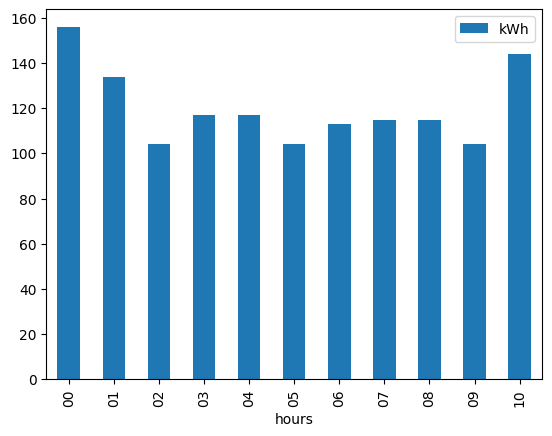

In [41]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [42]:
df_grp

,kWh
days,
21/08/23,0.585
22/08/23,3.702
23/08/23,4.240
24/08/23,3.679
25/08/23,3.967
...,...
22/01/25,4.783
23/01/25,3.821
24/01/25,3.551


In [43]:
# select number of days to display
span = 30
#df_grp.tail(span)


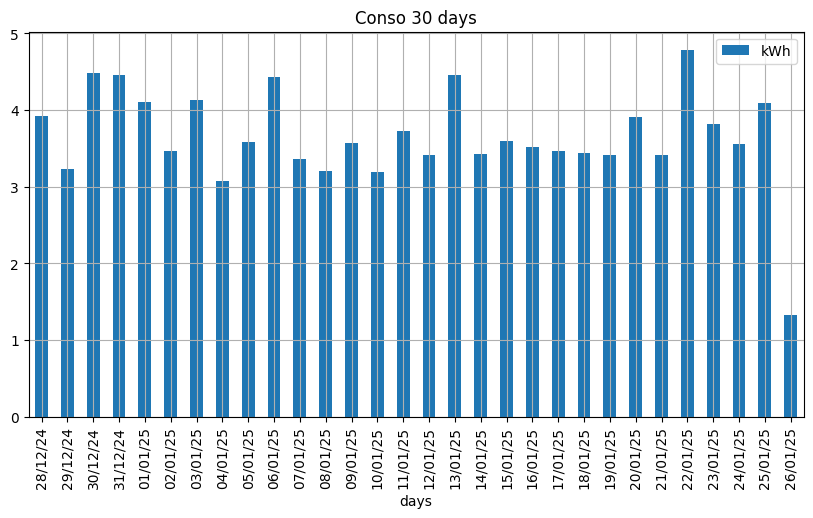

In [44]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


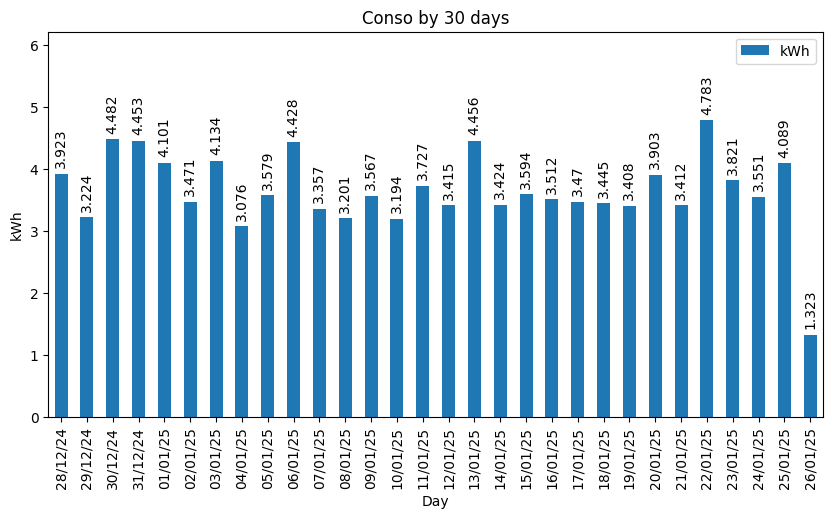

In [45]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [46]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
28/12/24    3.923
29/12/24    3.224
30/12/24    4.482
31/12/24    4.453
01/01/25    4.101
02/01/25    3.471
03/01/25    4.134
04/01/25    3.076
05/01/25    3.579
06/01/25    4.428
07/01/25    3.357
08/01/25    3.201
09/01/25    3.567
10/01/25    3.194
11/01/25    3.727
12/01/25    3.415
13/01/25    4.456
14/01/25    3.424
15/01/25    3.594
16/01/25    3.512
17/01/25    3.470
18/01/25    3.445
19/01/25    3.408
20/01/25    3.903
21/01/25    3.412
22/01/25    4.783
23/01/25    3.821
24/01/25    3.551
25/01/25    4.089
26/01/25    1.323
Name: kWh, dtype: float64

In [47]:
x_labels=df_grp.tail(span).index
x_labels

Index(['28/12/24', '29/12/24', '30/12/24', '31/12/24', '01/01/25', '02/01/25',
       '03/01/25', '04/01/25', '05/01/25', '06/01/25', '07/01/25', '08/01/25',
       '09/01/25', '10/01/25', '11/01/25', '12/01/25', '13/01/25', '14/01/25',
       '15/01/25', '16/01/25', '17/01/25', '18/01/25', '19/01/25', '20/01/25',
       '21/01/25', '22/01/25', '23/01/25', '24/01/25', '25/01/25', '26/01/25'],
      dtype='object', name='days')

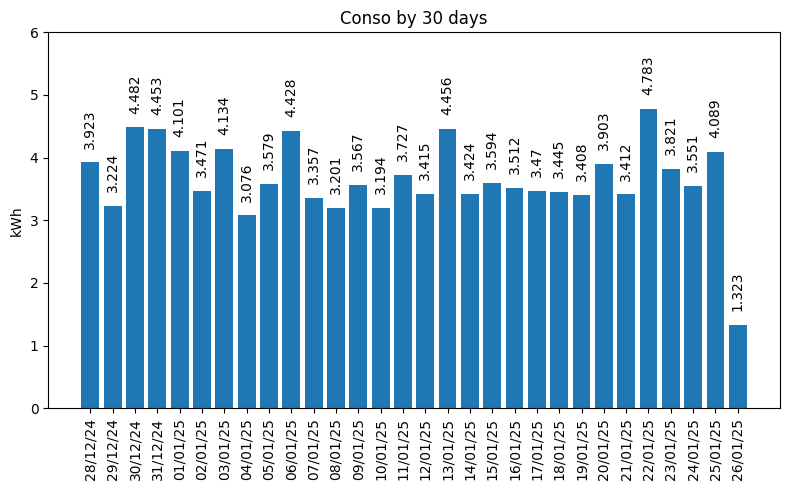

In [48]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [49]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

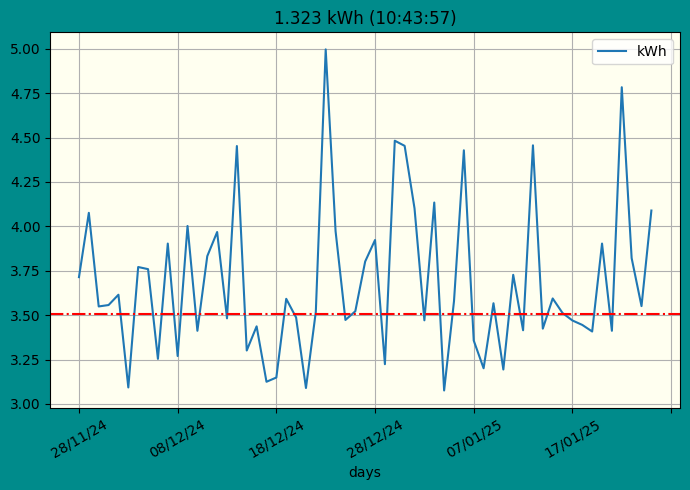

In [50]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

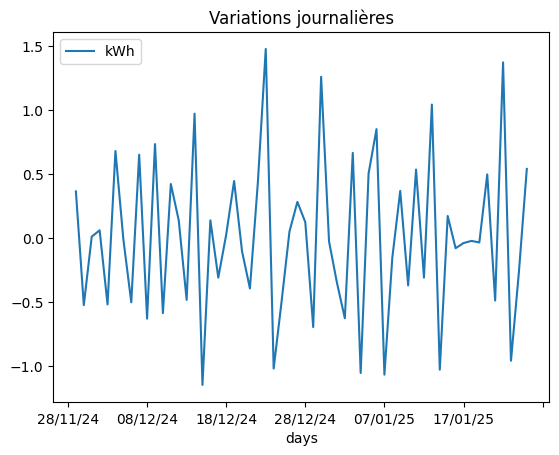

In [51]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [52]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:00:01.723491,21/08/23,21
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:00:23.581491,21/08/23,21
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:00:45.582491,21/08/23,21
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:01:07.510491,21/08/23,21
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:01:29.401491,21/08/23,21
...,...,...,...,...,...,...,...,...
1840854,29361,0.12,29.361,122.611628,45236518921,2025-01-26 10:41:38.710491,26/01/25,10
1840855,28194,0.13,28.194,127.686742,45236547115,2025-01-26 10:42:06.904491,26/01/25,10
1840856,27541,0.13,27.541,130.714208,45236574656,2025-01-26 10:42:34.445491,26/01/25,10
1840857,27263,0.13,27.263,132.047097,45236601919,2025-01-26 10:43:01.708491,26/01/25,10


In [53]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [54]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [55]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [56]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,585
22/08/23,3702
23/08/23,4240
24/08/23,3679
25/08/23,3967
...,...
22/01/25,4783
23/01/25,3821
24/01/25,3551


In [58]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:00:01.723491,21/08/23,21
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:00:23.581491,21/08/23,21
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:00:45.582491,21/08/23,21
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:01:07.510491,21/08/23,21
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:01:29.401491,21/08/23,21
...,...,...,...,...,...,...,...,...
1840854,29361,0.12,29.361,122.611628,45236518921,2025-01-26 10:41:38.710491,26/01/25,10
1840855,28194,0.13,28.194,127.686742,45236547115,2025-01-26 10:42:06.904491,26/01/25,10
1840856,27541,0.13,27.541,130.714208,45236574656,2025-01-26 10:42:34.445491,26/01/25,10
1840857,27263,0.13,27.263,132.047097,45236601919,2025-01-26 10:43:01.708491,26/01/25,10


In [59]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 21    0        21/08/23    21  0.16
               1        21/08/23    21  0.16
               2        21/08/23    21  0.16
               3        21/08/23    21  0.16
               4        21/08/23    21  0.16
...                          ...   ...   ...
26/01/25 10    1840854  26/01/25    10  0.12
               1840855  26/01/25    10  0.13
               1840856  26/01/25    10  0.13
               1840857  26/01/25    10  0.13
               1840858  26/01/25    10  0.13

[1840859 rows x 3 columns]

In [60]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [61]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/23', '17'), ('23/08/23', '18'), ('23/08/2

In [62]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,585,585
22/08/23,3702,3702
23/08/23,4240,4240
24/08/23,3679,3679
25/08/23,3967,3967
...,...,...
22/01/25,4783,4783
23/01/25,3821,3821
24/01/25,3551,3551


In [63]:
grp_by_day['kWh'].cumsum()

days
21/08/23        585
22/08/23       4287
23/08/23       8527
24/08/23      12206
25/08/23      16173
             ...   
22/01/25    1828075
23/01/25    1831896
24/01/25    1835447
25/01/25    1839536
26/01/25    1840859
Name: kWh, Length: 525, dtype: int64

In [64]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 21     174
         22     282
         23     129
22/08/23 00     130
         01     131
...             ...
26/01/25 06     113
         07     115
         08     115
         09     104
         10     144

[12566 rows x 1 columns]

In [65]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  21           174
          22           456
          23           585
22/08/23  00           715
          01           846
                    ...   
26/01/25  06       1840381
          07       1840496
          08       1840611
          09       1840715
          10       1840859
Name: kWh, Length: 12566, dtype: int64

In [ ]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 21     174     174    NaN
         22     282     456  108.0
         23     129     585 -153.0
22/08/23 00     130     130    NaN
         01     131     261    1.0
...             ...     ...    ...
26/01/25 06     113     845    9.0
         07     115     960    2.0
         08     115    1075    0.0
         09     104    1179  -11.0
         10     144    1323   40.0

[12566 rows x 3 columns]

In [67]:
today, grp_by_dayhours.loc[today]

('26/01/25',
        kWh  cumsum  diff
 hours                   
 00     156     156   NaN
 01     134     290 -22.0
 02     104     394 -30.0
 03     117     511  13.0
 04     117     628   0.0
 05     104     732 -13.0
 06     113     845   9.0
 07     115     960   2.0
 08     115    1075   0.0
 09     104    1179 -11.0
 10     144    1323  40.0)

Text(0.5, 1.0, 'Cumul journalier')

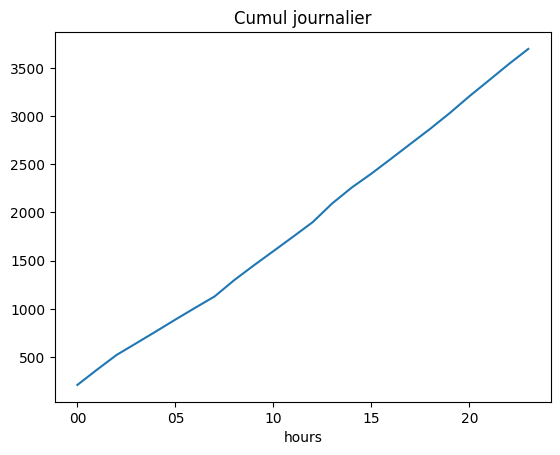

In [68]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

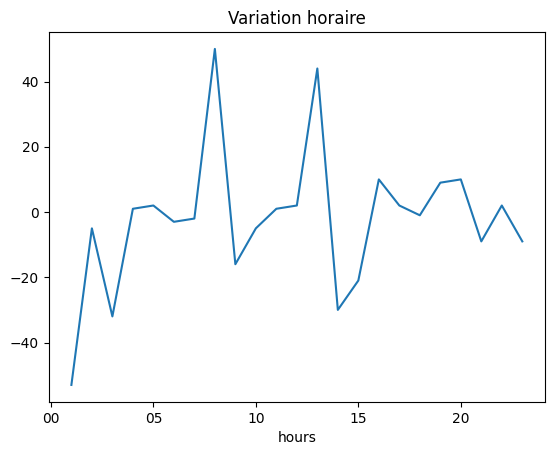

In [69]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [70]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

525

In [71]:
df_grp.tail(n)['kWh'].describe()


count    525.000000
mean       3.506398
std        0.682907
min        0.585000
25%        3.350000
50%        3.615000
75%        3.880000
max        5.078000
Name: kWh, dtype: float64

In [72]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '525 days')

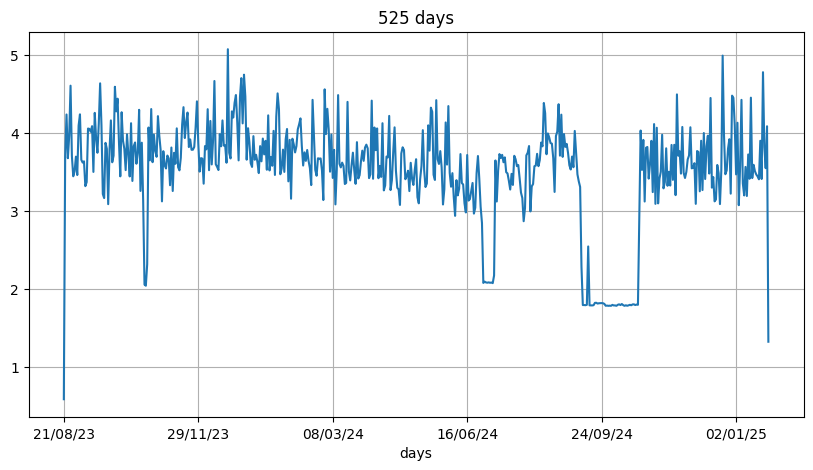

In [73]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '400 days')

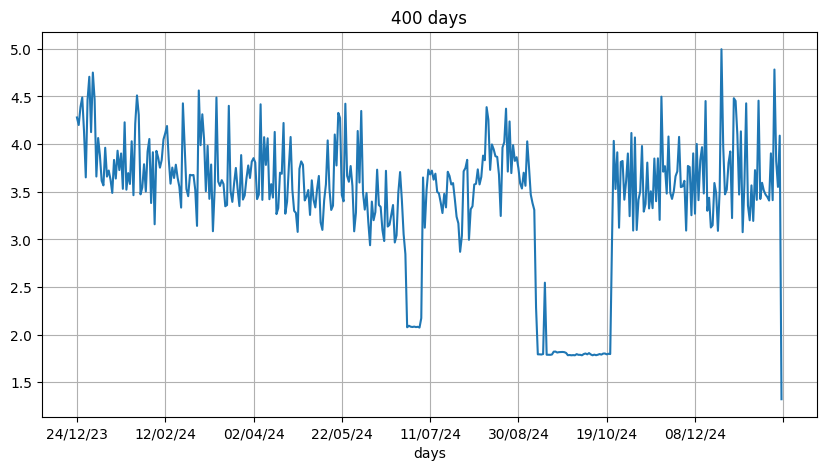

In [74]:
# show conso in span 
span = 400
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [75]:
df_grp['kWh']

days
21/08/23    0.585
22/08/23    3.702
23/08/23    4.240
24/08/23    3.679
25/08/23    3.967
            ...  
22/01/25    4.783
23/01/25    3.821
24/01/25    3.551
25/01/25    4.089
26/01/25    1.323
Name: kWh, Length: 525, dtype: float64

In [76]:
df_grp.describe()

,kWh
count,525.000000
mean,3.506398
std,0.682907
min,0.585000
25%,3.350000
50%,3.615000
75%,3.880000
max,5.078000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

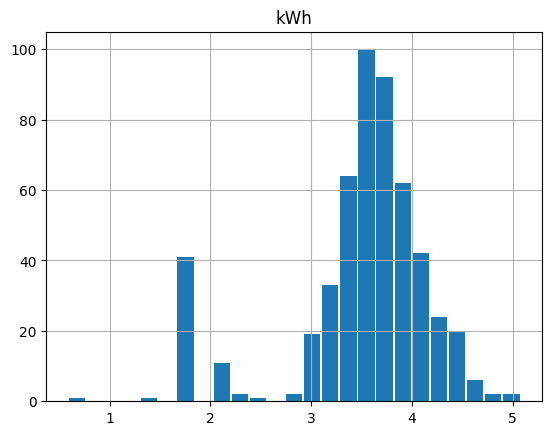

In [77]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [78]:
df_grp.tail(span)['kWh']

days
24/12/23    4.280
25/12/23    4.201
26/12/23    4.390
27/12/23    4.490
28/12/23    4.135
            ...  
22/01/25    4.783
23/01/25    3.821
24/01/25    3.551
25/01/25    4.089
26/01/25    1.323
Name: kWh, Length: 400, dtype: float64

# Conso par heure

In [79]:
day

'26/01/25'

In [80]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,156,156,NaN
01,134,290,-22.0
02,104,394,-30.0
03,117,511,13.0
04,117,628,0.0
05,104,732,-13.0
06,113,845,9.0
07,115,960,2.0
08,115,1075,0.0


In [81]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


11

In [82]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 12)

In [83]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [84]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [85]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [86]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [87]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 00 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     11 non-null     int64  
 1   cumsum  11 non-null     int64  
 2   diff    10 non-null     float64
 3   days    11 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 440.0+ bytes


In [88]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [89]:
day

'26/01/25'

In [90]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,156,156,NaN,1.0
01,134,290,-22.0,2.0
02,104,394,-30.0,3.0
03,117,511,13.0,4.0
04,117,628,0.0,5.0
05,104,732,-13.0,6.0
06,113,845,9.0,7.0
07,115,960,2.0,8.0
08,115,1075,0.0,9.0


Text(0.5, 1.0, '26/01/25')

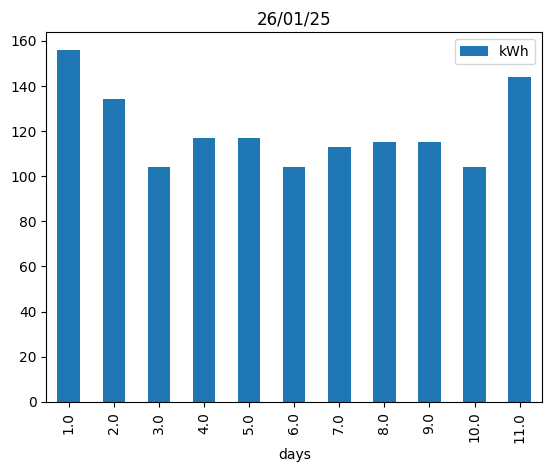

In [91]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [92]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object', name='hours')

# Conso du jour


In [93]:
groupedbyhour.count()

,kWh
hours,
00,156
01,134
02,104
03,117
04,117
05,104
06,113
07,115
08,115


In [94]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    166
01    149
02    168
03    154
04    165
05    167
06    146
07    133
08    124
09    121
10    131
11    114
12    130
13    131
14    172
15    156
16    143
17    269
18    869
19    239
20    301
21    285
22    318
23    327
Name: kWh, dtype: int64

In [95]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

357.297

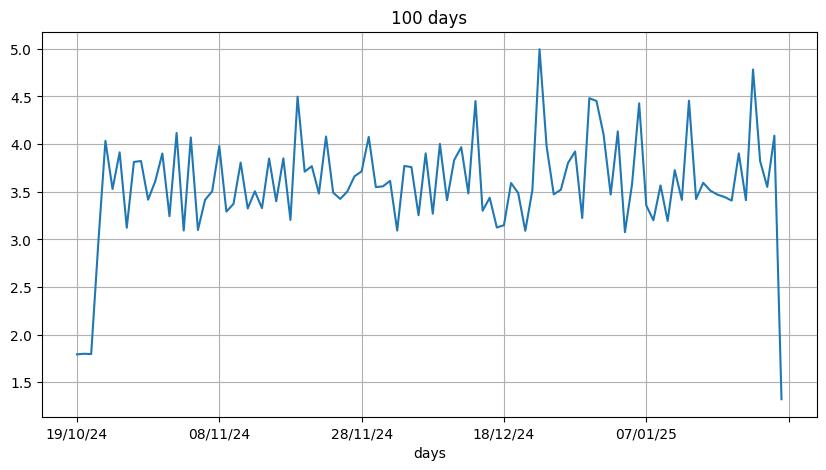

In [96]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [97]:
df_grp.tail(1)

,kWh
days,
26/01/25,1.323


In [98]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

1.323

In [99]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

97.0828378200531


# Today

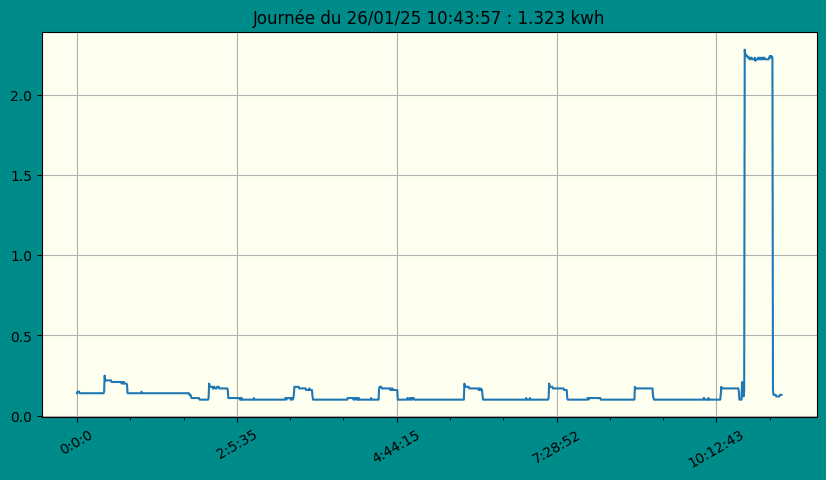

In [100]:
show(today,bgcolor='ivory')

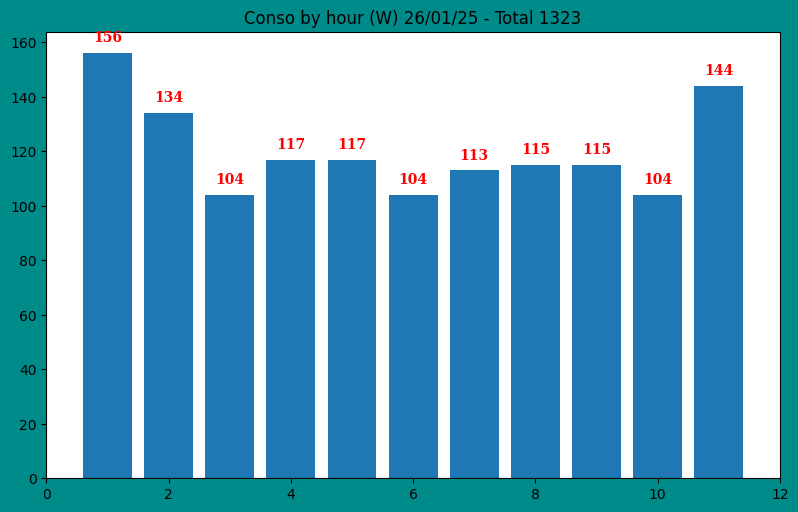

In [101]:
conso_by_hour(today)

In [102]:
day = '16/01/25'

('16/01/25', None)

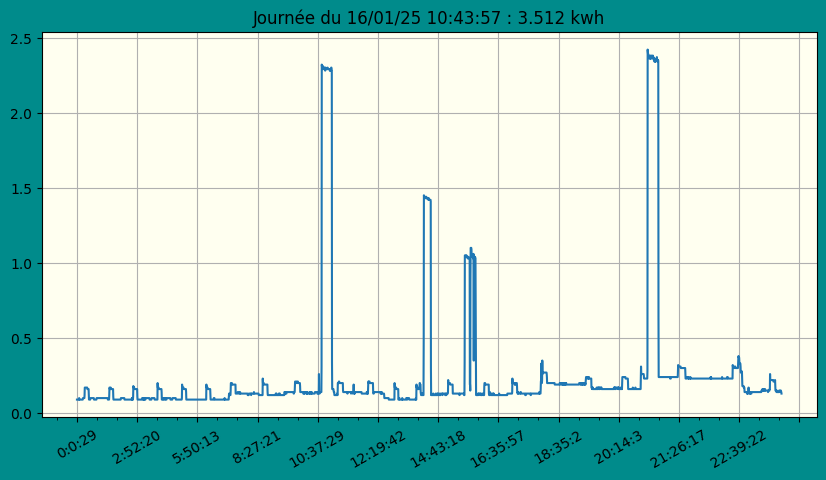

In [103]:
day, show(day,bgcolor='ivory')

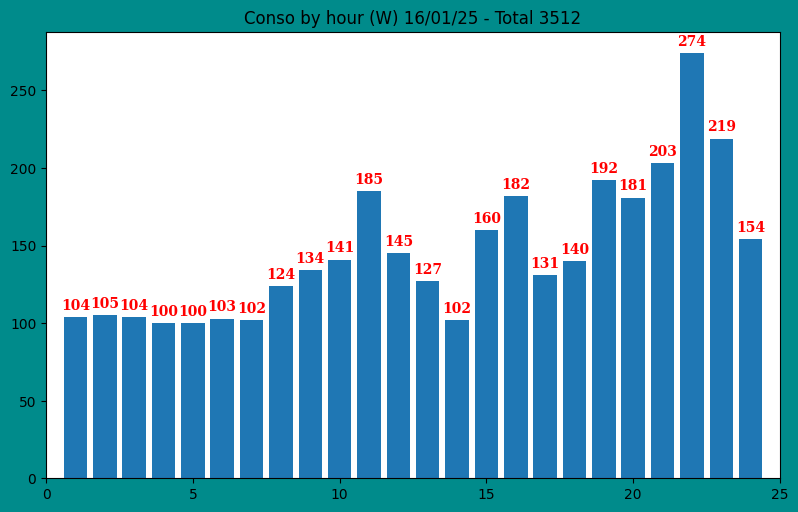

In [104]:
conso_by_hour(day)

In [105]:
maxday

'21/12/23'

('21/12/23', None)

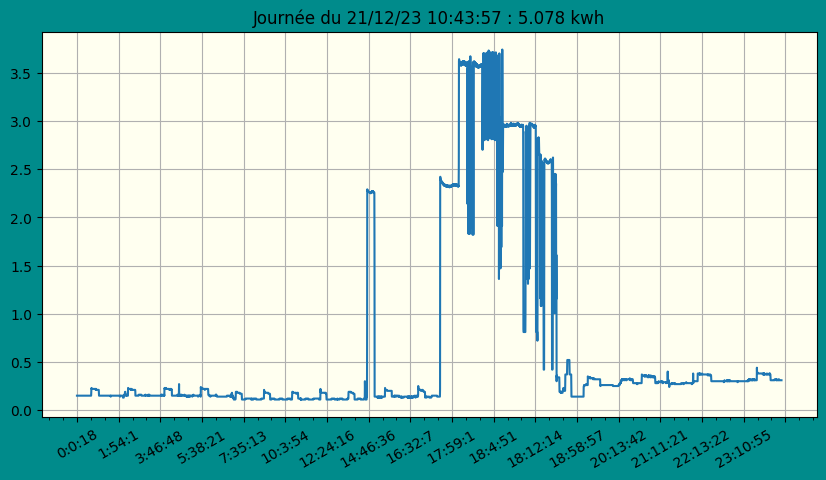

In [106]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

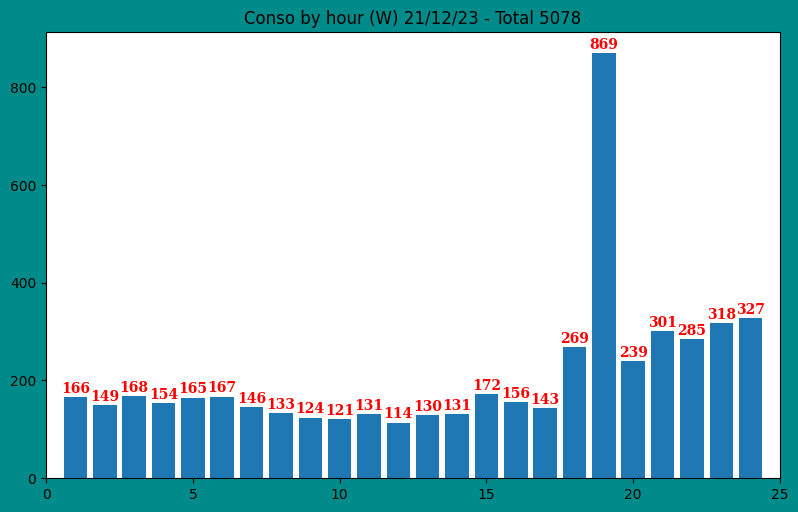

In [107]:
conso_by_hour(day)

In [108]:
sum(data)

5078

In [109]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,156,156,NaN,1.0
01,134,290,-22.0,2.0
02,104,394,-30.0,3.0
03,117,511,13.0,4.0
04,117,628,0.0,5.0
05,104,732,-13.0,6.0
06,113,845,9.0,7.0
07,115,960,2.0,8.0
08,115,1075,0.0,9.0


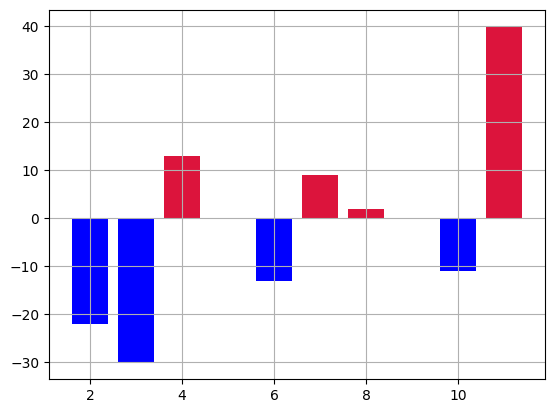

In [110]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [111]:
data

hours
00    166
01    149
02    168
03    154
04    165
05    167
06    146
07    133
08    124
09    121
10    131
11    114
12    130
13    131
14    172
15    156
16    143
17    269
18    869
19    239
20    301
21    285
22    318
23    327
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

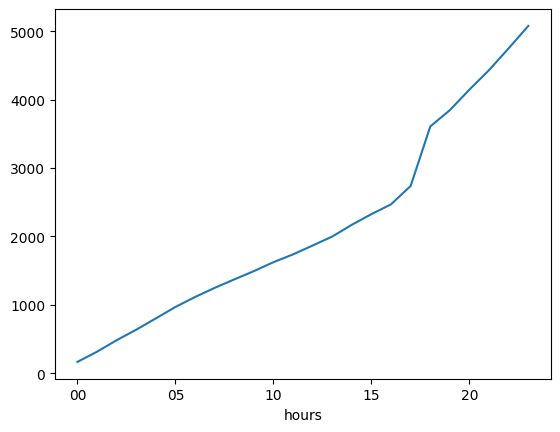

In [112]:
data.cumsum().plot()


<Axes: xlabel='hours'>

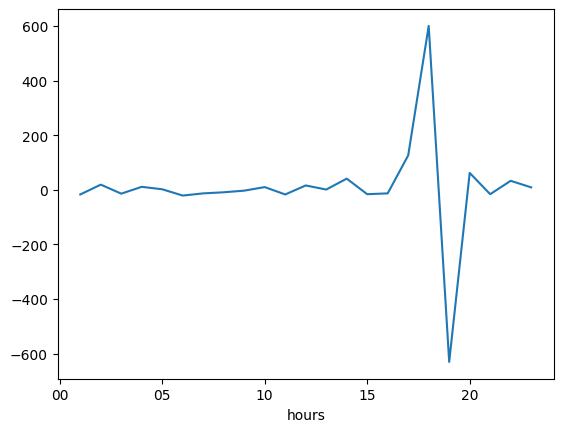

In [113]:
# evolution par heure
data.diff().plot()

In [114]:
data.diff().describe()

count     23.000000
mean       7.000000
std      188.455686
min     -630.000000
25%      -15.000000
50%        1.000000
75%       17.500000
max      600.000000
Name: kWh, dtype: float64

<Axes: >

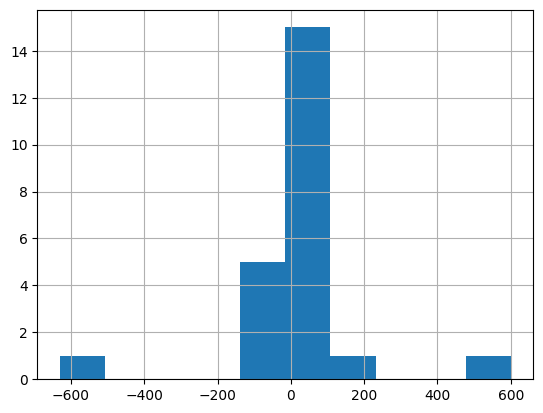

In [115]:
data.diff().hist()

# Test sauvegarde

In [116]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.git_old',
 '.ipynb_checkpoints',
 '1row.flf',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'amlich_soc_tiet.ipynb',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb

In [117]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [118]:
#conso_byhour(day)

In [119]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


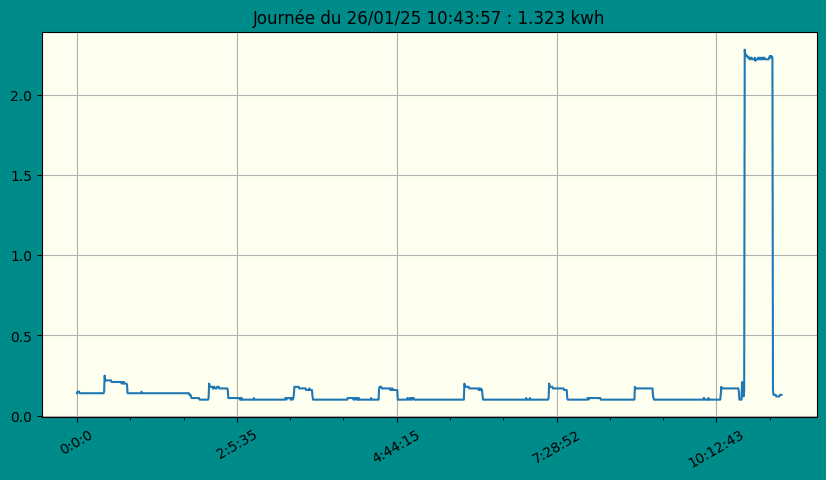

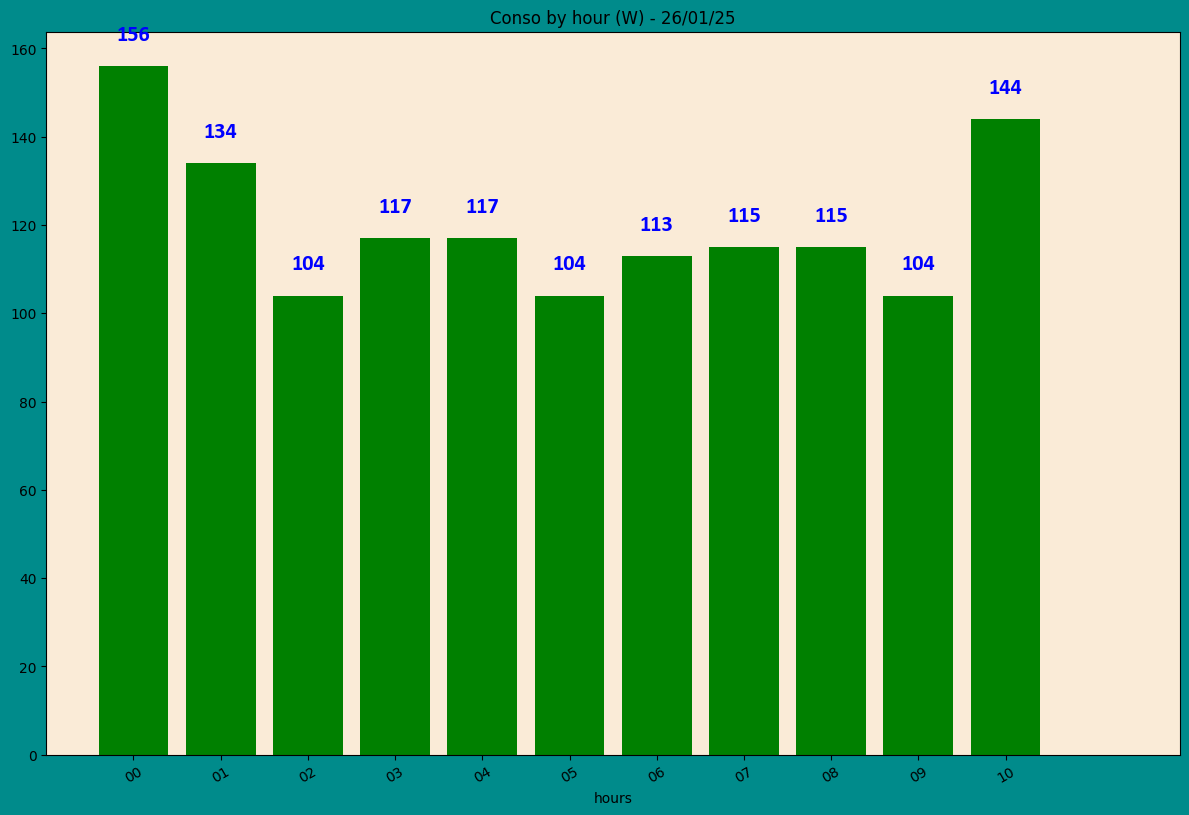

In [120]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [121]:
month.describe()


count    30.000000
mean      3.733400
std       0.449996
min       3.076000
25%       3.417250
50%       3.573000
75%       4.047500
max       4.783000
Name: kWh, dtype: float64

<Axes: >

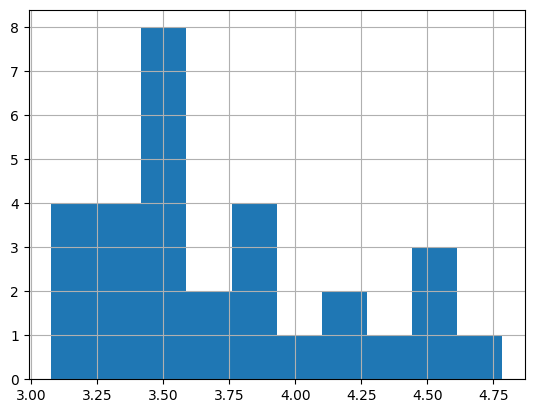

In [122]:
month.hist()

<Axes: xlabel='days'>

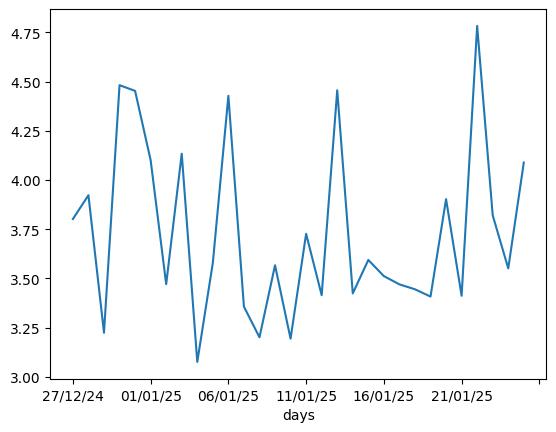

In [123]:
month.plot()

In [124]:
# date with max conso in 1 month
month.idxmax()

'22/01/25'

In [125]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'22/01/25'

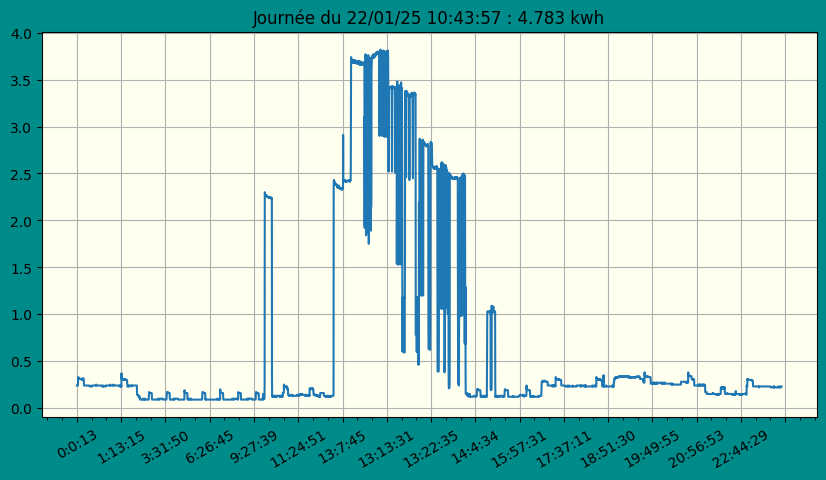

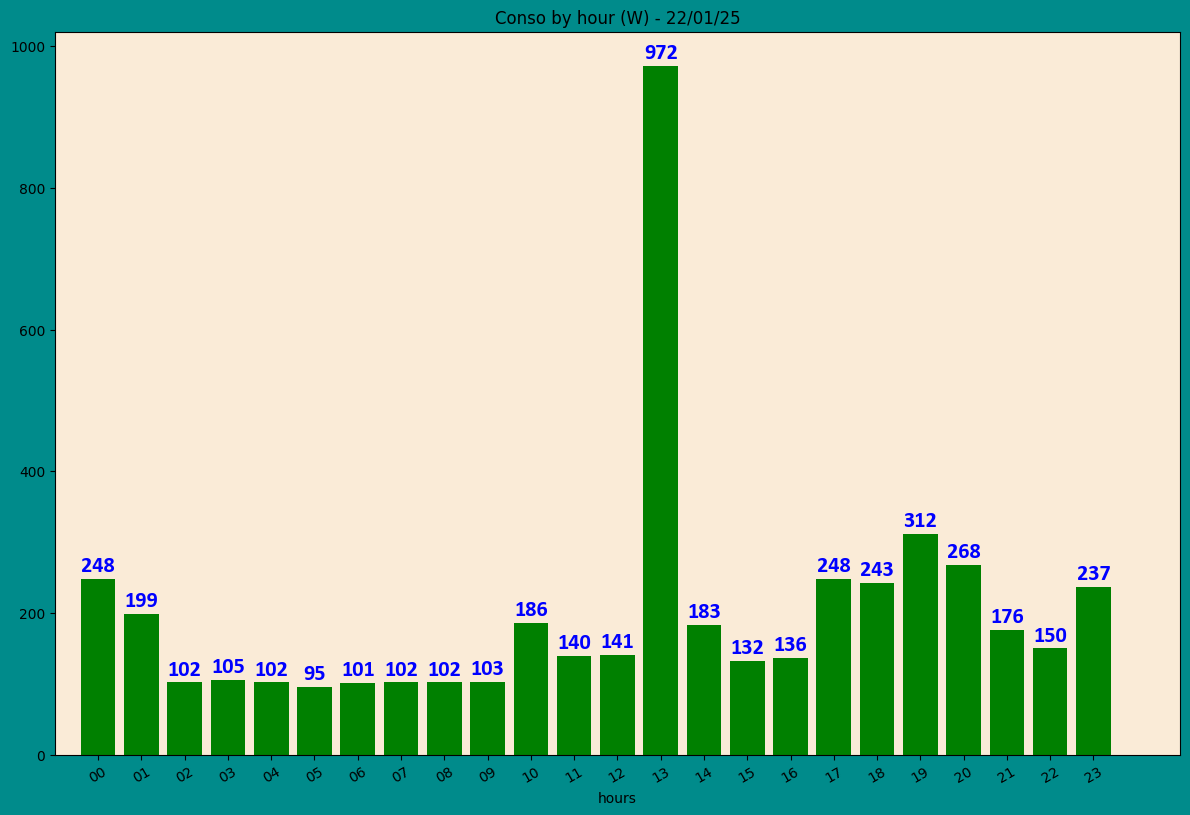

In [126]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [127]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 21     174     174    NaN   NaN
         22     282     456  108.0   NaN
         23     129     585 -153.0   NaN
22/08/23 00     130     130    NaN   NaN
         01     131     261    1.0   NaN
...             ...     ...    ...   ...
26/01/25 06     113     845    9.0   7.0
         07     115     960    2.0   8.0
         08     115    1075    0.0   9.0
         09     104    1179  -11.0  10.0
         10     144    1323   40.0  11.0

[12566 rows x 4 columns]

In [ ]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,248,248,NaN,NaN
01,199,447,-49.0,NaN
02,102,549,-97.0,NaN
03,105,654,3.0,NaN
04,102,756,-3.0,NaN
05,95,851,-7.0,NaN
06,101,952,6.0,NaN
07,102,1054,1.0,NaN
08,102,1156,0.0,NaN


In [129]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

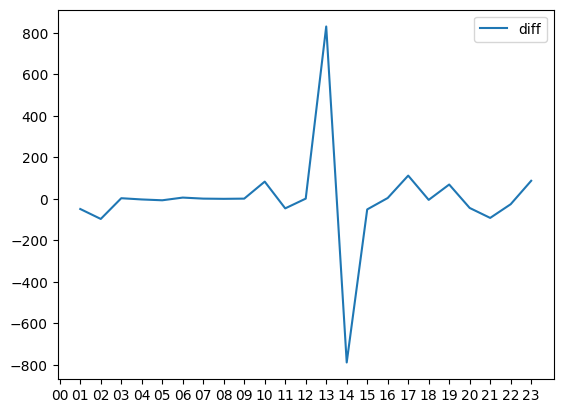

In [130]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

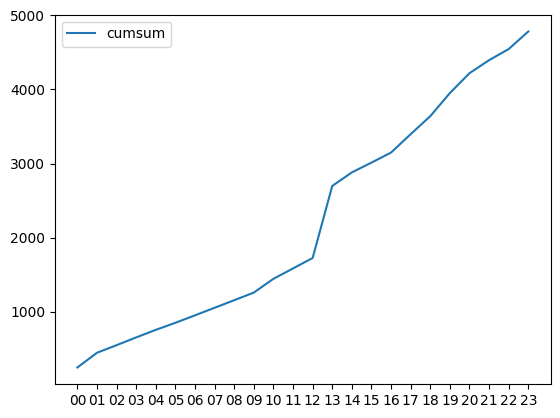

In [131]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [132]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB